### Competition Series 1: Forecast use of a city bike share system

Data come from kaggle https://www.kaggle.com/c/bike-sharing-demand.

https://www.kaggle.com/c/bike-sharing-demand/leaderboard

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline
sns.set_context("talk")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
train = pd.read_csv('kaggle/bike/bike_train.csv')

In [4]:
train.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [5]:
test = pd.read_csv('kaggle/bike/bike_test.csv')

In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].map(lambda x: x.year)
test['month'] = test['datetime'].map(lambda x: x.month)
test['hour'] = test['datetime'].map(lambda x: x.hour)
test.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4


In [8]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].map(lambda x: x.year)
train['month'] = train['datetime'].map(lambda x: x.month)
train['hour'] = train['datetime'].map(lambda x: x.hour)
train['day'] = train['datetime'].map(lambda x: x.day)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,2011,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,2011,1,4,1


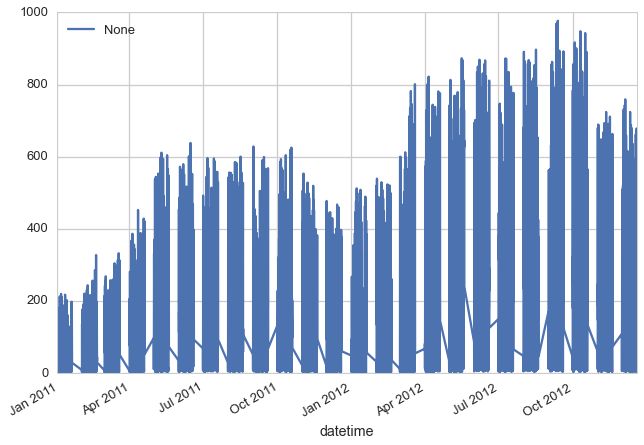

In [9]:
train.plot(x = 'datetime', y = 'count', kind = 'line');

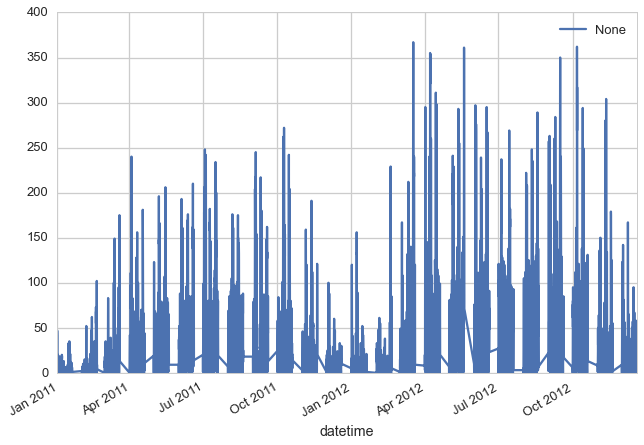

In [10]:
train.plot(x = 'datetime', y = 'casual', kind = 'line');

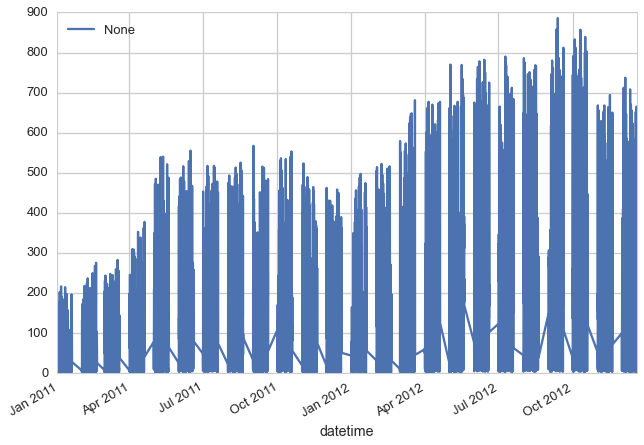

In [11]:
train.plot(x = 'datetime', y = 'registered', kind = 'line');

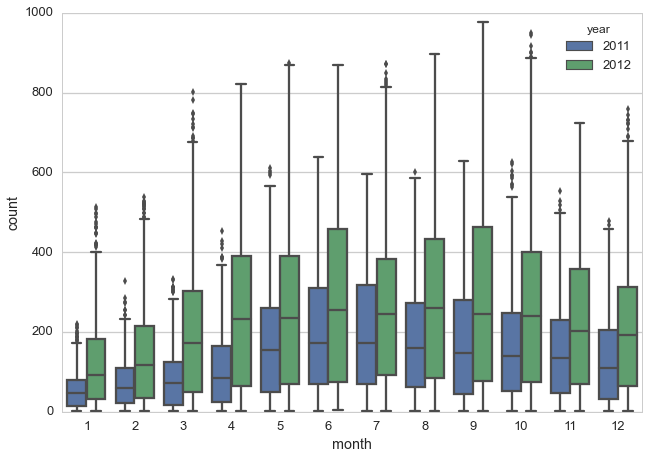

In [12]:
sns.boxplot(x = 'month', y = 'count', hue = 'year', data = train);

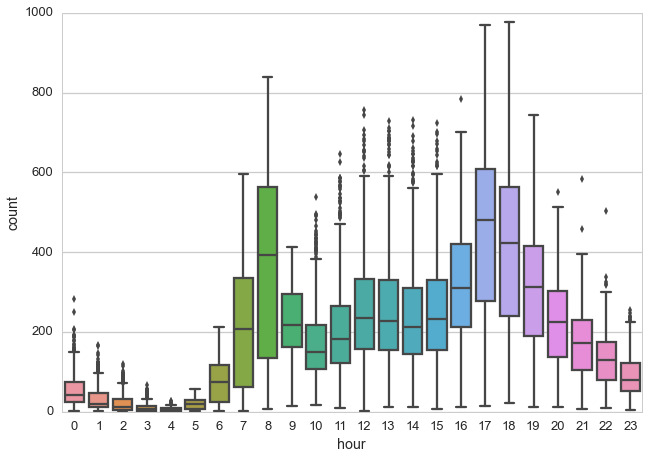

In [13]:
sns.boxplot(x = 'hour', y = 'count', data = train);

In [9]:
from sklearn.cross_validation import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV, LassoLarsCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [10]:
# model
lr = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV()
net = ElasticNetCV()
lar = LarsCV()
lassolars = LassoLarsCV()

tree = DecisionTreeRegressor(random_state = 0)
knn = KNeighborsRegressor()
svr_l = SVR(kernel = 'linear')
svr_r = SVR()

n_estimators = 100
bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators = n_estimators, random_state = 0)
rf = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
etree = ExtraTreesRegressor(n_estimators = n_estimators, random_state = 0)
ada = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = n_estimators, random_state = 0)
gbr = GradientBoostingRegressor(n_estimators = n_estimators, random_state = 0)


In [40]:
train_train = train[(train.day != 18) & (train.day != 19)]
train_test = train[(train.day == 18) | (train.day == 19)]

- using mean_squared_error as score
- use sub train dataset to train model 

In [ ]:
x = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour']

In [53]:
# decision tree 
print(cross_val_score(tree, train_train[x], train_train['count'], cv = 3))
print(tree.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.61130311  0.51056725  0.77113936]
0.832140669582


In [56]:
# bagging
print(cross_val_score(bag, train_train[x], train_train['count'], cv = 3))
print(bag.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.68271393  0.55809082  0.84608659]
0.905022469914


In [57]:
# random forest
print(cross_val_score(rf, train_train[x], train_train['count'], cv = 3))
print(rf.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.68247786  0.55772533  0.84609294]
0.904360773167


In [58]:
# Extra Tree
print(cross_val_score(etree, train_train[x], train_train['count'], cv = 3))
print(etree.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.72129396  0.75465046  0.84242995]
0.908919459615


In [43]:
# Extra Tree
print(cross_val_score(etree, train_train[x], train_train['count'], cv = 3, scoring = 'mean_squared_error'))
print(etree.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[-4819.31653412 -6013.30257962 -7539.5352976 ]
0.908919459615


In [42]:
# Extra Tree
print(cross_val_score(etree, train_train[x], train_train['count'], cv = 3, scoring = 'r2'))
print(etree.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.72129396  0.75465046  0.84242995]
0.908919459615


In [59]:
# ada boost 
print(cross_val_score(ada, train_train[x], train_train['count'], cv = 3))
print(ada.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.68515859  0.77584122  0.82780516]
0.90338927543


In [60]:
# Gradient Boost
print(cross_val_score(gbr, train_train[x], train_train['count'], cv = 3))
print(gbr.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.64755767  0.80496491  0.7554594 ]
0.846406263419


- using mean_squared_error as score
- use all train dataset to train model 

In [64]:
# Extra Tree
print(cross_val_score(etree, train[x], train['count'], cv = 3))

[ 0.7187392   0.73566471  0.84468928]


- using root_mean_squared_logarithmic_error as score
- use sub train dataset to train model 

In [48]:
def rmsle(pred_count, actual_count):
    return round(np.sqrt(np.mean((np.log(pred_count + 1) - np.log(actual_count + 1)) ** 2)), 5) 

In [85]:
x = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour']

In [28]:
# bagging
rmsle(bag.fit(train_train[x], train_train['count']).predict(train_test[x]), train_test['count']) 

0.35786

In [27]:
# random forest
rmsle(rf.fit(train_train[x], train_train['count']).predict(train_test[x]), train_test['count']) 

0.35707

In [26]:
# etree
rmsle(etree.fit(train_train[x], train_train['count']).predict(train_test[x]), train_test['count']) 

0.37549

In [34]:
rmsle(tree.fit(train_train[x], train_train['count']).predict(train_test[x]), train_test['count']) 

0.46615

In [29]:
# adaBoost
rmsle(ada.fit(train_train[x], train_train['count']).predict(train_test[x]), train_test['count']) 

0.49162

In [30]:
# gradient boost
rmsle(gbr.fit(train_train[x], train_train['count']).predict(train_test[x]), train_test['count']) 

0.62472

- predict test data

In [ ]:
# Extra Tree
# 0.47448
etree_pred = etree.fit(train[x], train['count']).predict(test[x])
etree_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_pred)}) 
etree_df.to_csv('kaggle/etree_sub.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [39]:
# random forest
# 0.48111
rf_pred = rf.fit(train[x], train['count']).predict(test[x])
rf_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(rf_pred)}) 
rf_df.to_csv('kaggle/rf_sub.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [40]:
# bagging
# 0.48020
bag_pred = bag.fit(train[x], train['count']).predict(test[x])
bag_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(bag_pred)}) 
bag_df.to_csv('kaggle/bag_sub.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [41]:
# adaBoost
# 0.56769
ada_pred = ada.fit(train[x], train['count']).predict(test[x])
ada_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(ada_pred)}) 
ada_df.to_csv('kaggle/ada_sub.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In light of facts, the method of cross validation is effect, no matter what score is used.

By the way, r2 is more and better, rmsle is less and better.

- Extra tree is best, the value of r2 by cv is 0.9089, the value of root_mean_squared_logarithmic_error in test is 0.47448;
- then Bagging is better, r2 is 0.9050, rmsle is 0.48020;
- the last one is random forest, r2 is 0.9043, rmsle is 0.48111.


### Stage 2
- try other features
- predict casual and registered then sum them up get count
- because casual and registered have different behavior

In [44]:
# Extra Tree 
# best on predict casual
print(cross_val_score(etree, train_train[x], train_train['casual'], cv = 3))
print(etree.fit(train_train[x], train_train['casual']).score(train_test[x], train_test['casual']))

[ 0.74974079  0.78082547  0.80300144]
0.830261919431


In [47]:
# bagging
print(cross_val_score(bag, train_train[x], train_train['casual'], cv = 3))
print(bag.fit(train_train[x], train_train['casual']).score(train_test[x], train_test['casual']))

[ 0.73297192  0.74632395  0.81721639]
0.779956223473


In [48]:
# random forest
print(cross_val_score(rf, train_train[x], train_train['casual'], cv = 3))
print(rf.fit(train_train[x], train_train['casual']).score(train_test[x], train_test['casual']))

[ 0.73254186  0.74786258  0.81534111]
0.777642146161


In [46]:
# Extra Tree
print(cross_val_score(etree, train_train[x], train_train['registered'], cv = 3))
print(etree.fit(train_train[x], train_train['registered']).score(train_test[x], train_test['registered']))

[ 0.64851947  0.75314214  0.84699378]
0.914819161077


In [49]:
# bagging
# best on predict registered
print(cross_val_score(bag, train_train[x], train_train['registered'], cv = 3))
print(bag.fit(train_train[x], train_train['registered']).score(train_test[x], train_test['registered']))

[ 0.65504423  0.85881113  0.84952455]
0.921408375626


In [50]:
# random forest
print(cross_val_score(rf, train_train[x], train_train['registered'], cv = 3))
print(rf.fit(train_train[x], train_train['registered']).score(train_test[x], train_test['registered']))

[ 0.65688065  0.85308024  0.85055485]
0.919820055967


- predict test data

In [15]:
# etree + bag
pred_etree_bag = etree.fit(train_train[x], train_train['casual']).predict(train_test[x]) +\
                 bag.fit(train_train[x], train_train['registered']).predict(train_test[x])
rmsle(pred_etree_bag, train_test['count']) 

0.36075

In [16]:
r2_score(y_true = train_test['count'], y_pred = pred_etree_bag)

0.91396275169355001

In [34]:
# Extra Tree + bagging
# 0.48282
etree_bag_pred = etree.fit(train[x], train['casual']).predict(test[x]) +\
                 bag.fit(train[x], train['registered']).predict(test[x])
etree_bag_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_bag_pred)}) 
etree_bag_df.to_csv('kaggle/etree_bag_sub.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

#### explore the data again!

In [35]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,2011,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,2011,1,4,1


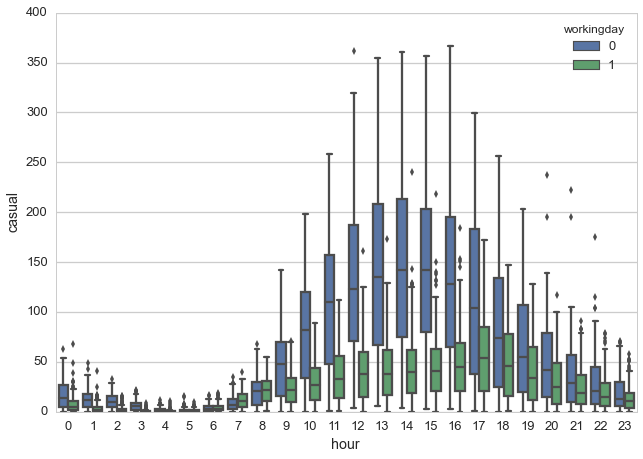

In [14]:
# nonmeber bikers
# just like freelance, no workingday is more active 
sns.boxplot(x = 'hour', y = 'casual', hue = 'workingday', data = train);

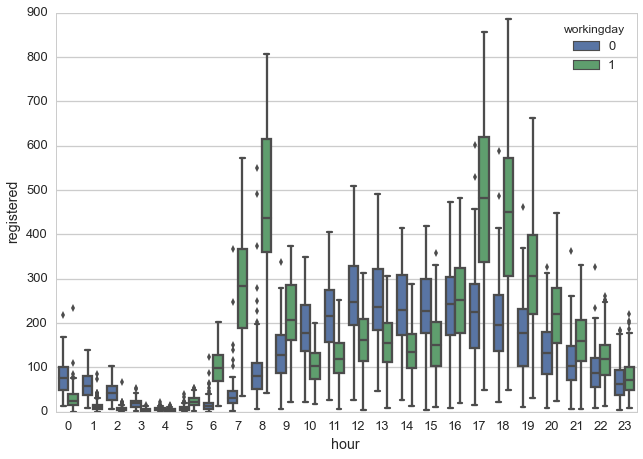

In [15]:
# member bikers
# at workingday, they active at 8 o'clock, 17 o'clock, 18 o'clock rush hour.
# feature rush_hour_working focus on above situation.
####################
# at no workingday, their biking behaviour just like the nonmember biker (casual). 
# feature adverse_rush_hour focus on above situation.
sns.boxplot(x = 'hour', y = 'registered', hue = 'workingday', data = train);

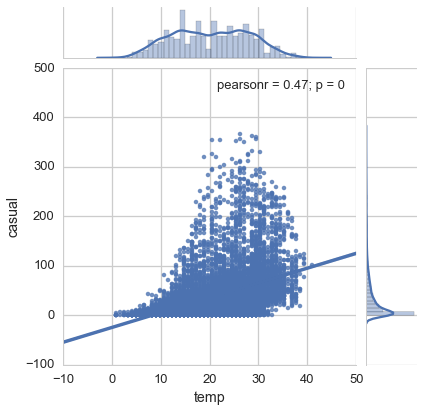

In [28]:
# nonmember
sns.jointplot(x = "temp", y = "casual", data = train, kind = "reg");

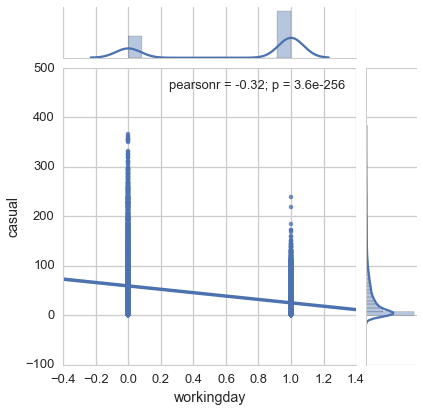

In [32]:
sns.jointplot(x = "workingday", y = "casual", data = train, kind = "reg");

In [12]:
# for registered workingday pattern
train['rush_hour_working'] = ((train['hour'] == 7) | (train['hour'] == 8) | (train['hour'] == 17) |\
                    (train['hour'] == 18) | (train['hour'] == 19)) & (train['workingday'] == 1)

test['rush_hour_working'] = ((test['hour'] == 7) | (test['hour'] == 8) | (test['hour'] == 17) |\
                    (test['hour'] == 18) | (test['hour'] == 19)) & (test['workingday'] == 1)

In [38]:
x_t = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', \
       'year', 'month', 'hour', 'rush_hour_working']

In [42]:
# bagging
# best on predict registered
print(cross_val_score(bag, train_train[x_t], train_train['registered'], cv = 3))
print(bag.fit(train_train[x_t], train_train['registered']).score(train_test[x_t], train_test['registered']))

[ 0.62080745  0.86539843  0.85005891]
0.925286752863


In [49]:
pred_etree_bag = etree.fit(train_train[x], train_train['casual']).predict(train_test[x]) +\
                 bag.fit(train_train[x_t], train_train['registered']).predict(train_test[x_t])
print(rmsle(pred_etree_bag, train_test['count']))
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag))

0.36295
0.916712421753


In [50]:
# 0.48173
etree_bag_pred2 = etree.fit(train[x], train['casual']).predict(test[x]) +\
                 bag.fit(train[x_t], train['registered']).predict(test[x_t])
etree_bag_df2 = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_bag_pred2)}) 
etree_bag_df2.to_csv('kaggle/etree_bag_sub2.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

- only predict 'count'
- add more features

In [13]:
# for casual pattern
train['adverse_rush_hour'] = abs(train['hour'] -14)
test['adverse_rush_hour'] = abs(test['hour'] -14)

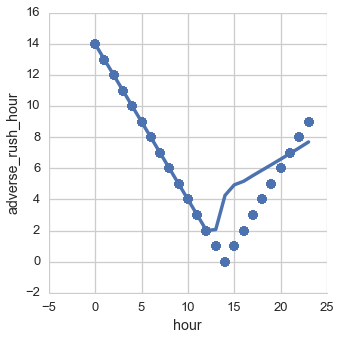

In [38]:
sns.lmplot(x = 'hour', y = 'adverse_rush_hour', data = train, lowess = True, scatter_kws={"s": 80});

In [14]:
train['weekday'] = train['datetime'].map(lambda x: x.dayofweek)
test['weekday'] = test['datetime'].map(lambda x: x.dayofweek)

In [15]:
# workingday is already exclude weekend and holiday
train['weekend'] = (train['weekday'] == 5) | (train['weekday'] == 6)
test['weekend'] = (test['weekday'] == 5) | (test['weekday'] == 6)

In [16]:
train_train = train[(train.day != 18) & (train.day != 19)]
train_test = train[(train.day == 18) | (train.day == 19)]

In [17]:
x_t2 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour',\
        'rush_hour_working', 'weekday', 'weekend', 'adverse_rush_hour'] 

In [82]:
# Extra Tree
print(cross_val_score(etree, train_train[x_t2], train_train['count'], cv = 3, scoring = 'mean_squared_error'))
print(etree.fit(train_train[x_t2], train_train['count']).score(train_test[x_t2], train_test['count']))

[-5139.00953038 -6214.82774663 -5352.31203238]
0.91254180526


In [91]:
# Extra Tree
# 0.47448 x
# 0.44763 x_t2
etree_pred = etree.fit(train[x_t2], train['count']).predict(test[x_t2])
etree_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_pred)}) 
etree_df.to_csv('kaggle/etree_sub_x_t2.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [92]:
pred_etree_bag = etree.fit(train_train[x_t2], train_train['casual']).predict(train_test[x_t2]) +\
                 bag.fit(train_train[x_t2], train_train['registered']).predict(train_test[x_t2])
print(rmsle(pred_etree_bag, train_test['count']))
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag))

0.32748
0.92458329423


In [93]:
# 0.48173 x_t
# 0.46504 x_t2
etree_bag_pred2 = etree.fit(train[x_t2], train['casual']).predict(test[x_t2]) +\
                 bag.fit(train[x_t2], train['registered']).predict(test[x_t2])
etree_bag_df2 = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_bag_pred2)}) 
etree_bag_df2.to_csv('kaggle/etree_bag_sub_x_t2.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

- The value of root_mean_squared_logarithmic_error in test decrease from **0.47448 to 0.44763**.
- **The algorithm still is etree, the different is features, add 'rush_hour_working', 'weekday', 'weekend', 'adverse_rush_hour'.**

#### The importance of features

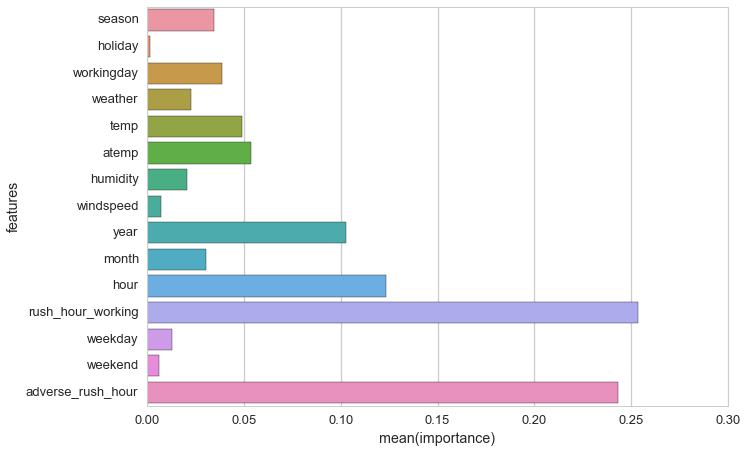

In [22]:
imp = etree.fit(train[x_t2], train['count']).feature_importances_
df_imp = pd.DataFrame({'features':x_t2, 'importance': imp})
sns.barplot(y = 'features', x = 'importance', data = df_imp);

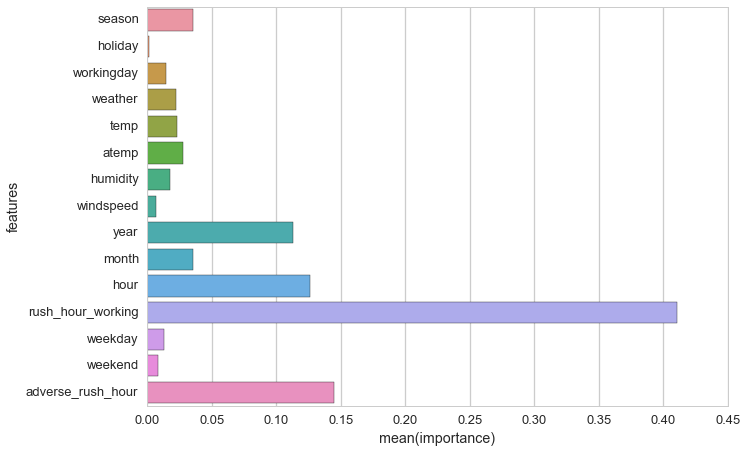

In [24]:
# the importance of features for memeber of bikers
imp = etree.fit(train[x_t2], train['registered']).feature_importances_
df_imp = pd.DataFrame({'features':x_t2, 'importance': imp})
sns.barplot(y = 'features', x = 'importance', data = df_imp);

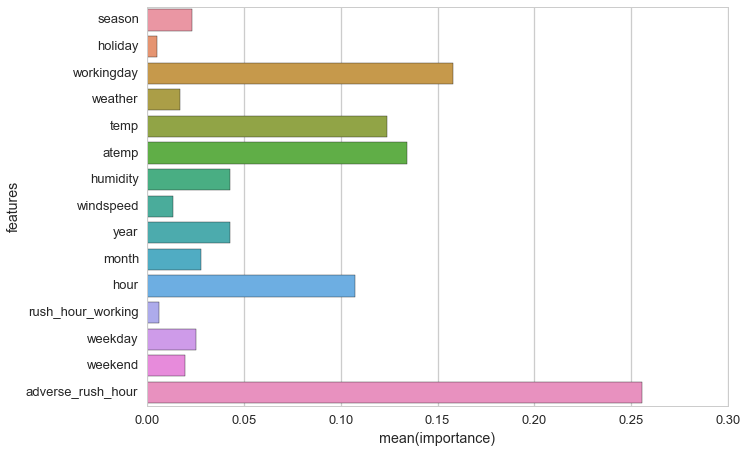

In [23]:
# for nonmembers
imp = etree.fit(train[x_t2], train['casual']).feature_importances_
df_imp = pd.DataFrame({'features':x_t2, 'importance': imp})
sns.barplot(y = 'features', x = 'importance', data = df_imp);

### Stage 3

In [64]:
# capture total trend 
train['log_time_scale'] = train['datetime'].map(lambda x: np.log((x - pd.to_datetime('2010-12-31 23:00:00')).total_seconds()))
test['log_time_scale'] = test['datetime'].map(lambda x: np.log((x - pd.to_datetime('2010-12-31 23:00:00')).total_seconds()))

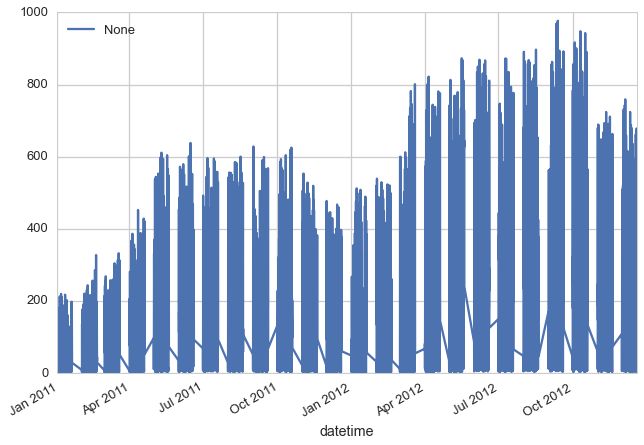

In [60]:
train.plot(x = 'datetime', y = 'count', kind = 'line');

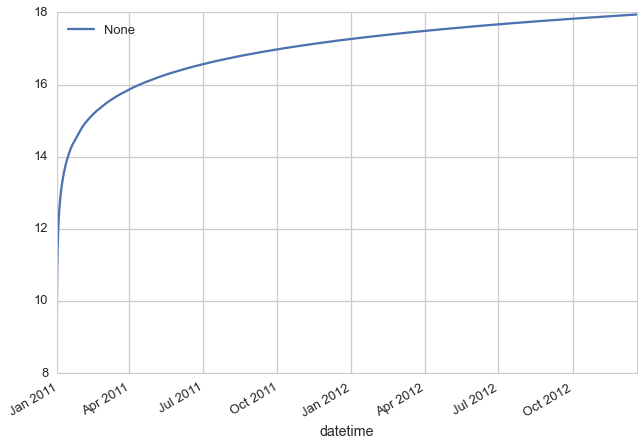

In [61]:
train.plot(x = 'datetime', y = 'log_time_scale', kind = 'line');

In [66]:
train['temp2'] = train.temp ** 2
train['atemp2'] = train.atemp ** 2
train['winds2'] = train.windspeed ** 2
train['hum2'] = train.humidity ** 2
train['w2'] = train.weather ** 2

train['winter'] = train.season.apply(lambda x: 1 if x==1 else 0)
train['spring'] = train.season.apply(lambda x: 1 if x==2 else 0)
train['summer'] = train.season.apply(lambda x: 1 if x==3 else 0)
train['fall'] = train.season.apply(lambda x: 1 if x==4 else 0)

train['log_casual'] = train.casual.apply(lambda x: np.log(x + 1.0))
train['log_rgstr'] = train.registered.apply(lambda x: np.log(x + 1.0))

train['ww'] = train.winter * train.weather
train['spw'] = train.spring * train.weather
train['suw'] = train.summer * train.weather
train['fw'] = train.fall * train.weather

train['ww2'] = train.winter * train.w2
train['spw2'] = train.spring * train.w2
train['suw2'] = train.summer * train.w2
train['fw2'] = train.fall * train.w2

train['wt'] = train.winter * train.atemp
train['spt'] = train.spring * train.atemp
train['sut'] = train.summer * train.atemp
train['ft'] = train.fall * train.atemp

train['log_time_scale2'] = train.log_time_scale ** 2

In [67]:
test['temp2'] = test.temp ** 2
test['atemp2'] = test.atemp ** 2
test['winds2'] = test.windspeed ** 2
test['hum2'] = test.humidity ** 2
test['w2'] = test.weather ** 2

test['winter'] = test.season.apply(lambda x: 1 if x==1 else 0)
test['spring'] = test.season.apply(lambda x: 1 if x==2 else 0)
test['summer'] = test.season.apply(lambda x: 1 if x==3 else 0)
test['fall'] = test.season.apply(lambda x: 1 if x==4 else 0)

test['ww'] = test.winter * test.weather
test['spw'] = test.spring * test.weather
test['suw'] = test.summer * test.weather
test['fw'] = test.fall * test.weather

test['ww2'] = test.winter * test.w2
test['spw2'] = test.spring * test.w2
test['suw2'] = test.summer * test.w2
test['fw2'] = test.fall * test.w2

test['wt'] = test.winter * test.atemp
test['spt'] = test.spring * test.atemp
test['sut'] = test.summer * test.atemp
test['ft'] = test.fall * test.atemp

test['log_time_scale2'] = test.log_time_scale ** 2

In [69]:
square = ['temp2', 'atemp2', 'winds2', 'hum2', 'w2']
seasons = ['spring', 'summer', 'winter', 'fall']
season_weather = ['ww', 'spw', 'suw', 'fw', 'ww2', 'spw2', 'suw2', 'fw2']
season_temp = ['wt', 'spt', 'sut', 'ft']
x_t3 = x_t2 + square + seasons + season_weather + season_temp + ['log_time_scale', 'log_time_scale2']

In [72]:
train_train = train[(train.day != 18) & (train.day != 19)]
train_test = train[(train.day == 18) | (train.day == 19)]

In [74]:
# Extra Tree
print(cross_val_score(etree, train_train[x_t3], train_train['count'], cv = 3, scoring = 'mean_squared_error'))
print(etree.fit(train_train[x_t3], train_train['count']).score(train_test[x_t3], train_test['count']))

[-4945.14584982 -5697.17609717 -6115.05199486]
0.914831805982


In [75]:
# Extra Tree
# 0.47448 x
# 0.44763 x_t2
# 0.44606 x_t3
etree_pred = etree.fit(train[x_t3], train['count']).predict(test[x_t3])
etree_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_pred)}) 
etree_df.to_csv('kaggle/bike/etree_sub_x_t3.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

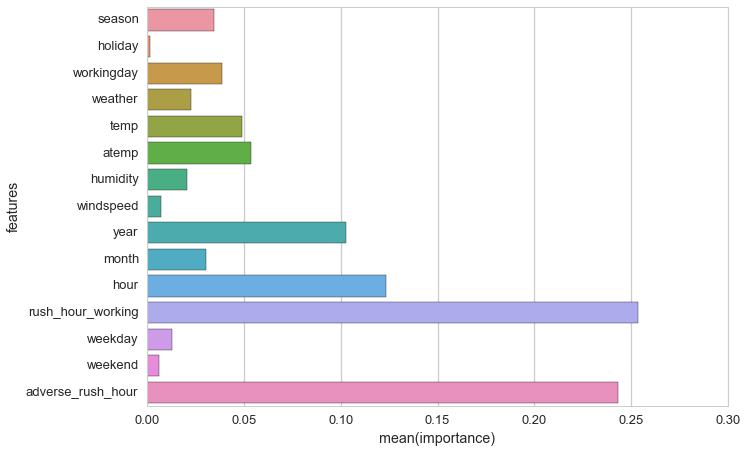

In [76]:
imp = etree.fit(train[x_t2], train['count']).feature_importances_
df_imp = pd.DataFrame({'features':x_t2, 'importance': imp})
sns.barplot(y = 'features', x = 'importance', data = df_imp);

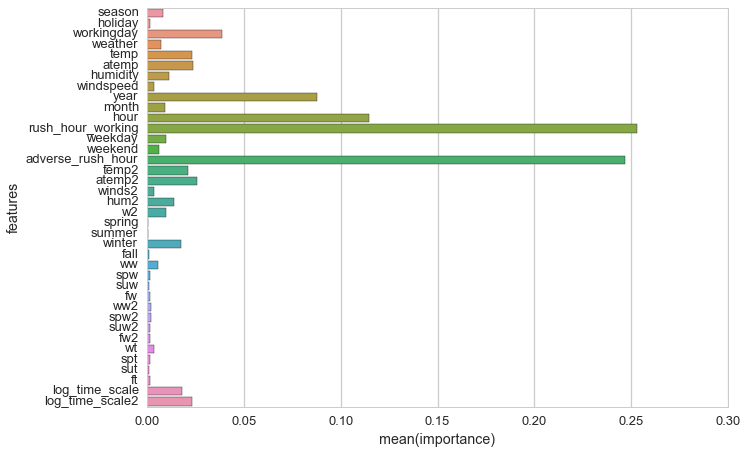

In [77]:
imp = etree.fit(train[x_t3], train['count']).feature_importances_
df_imp = pd.DataFrame({'features':x_t3, 'importance': imp})
sns.barplot(y = 'features', x = 'importance', data = df_imp);

In [86]:
# linear regression 
# x
print(cross_val_score(lr, train_train[x], train_train['count'], cv = 3))
print(lr.fit(train_train[x], train_train['count']).score(train_test[x], train_test['count']))

[ 0.27864939  0.30899994  0.27287682]
0.331396864482


In [82]:
# linear regression 
# x_t2
print(cross_val_score(lr, train_train[x_t2], train_train['count'], cv = 3))
print(lr.fit(train_train[x_t2], train_train['count']).score(train_test[x_t2], train_test['count']))

[ 0.43984036  0.6869551   0.62735616]
0.69984373922


In [81]:
# linear regression
# x_t3
print(cross_val_score(lr, train_train[x_t3], train_train['count'], cv = 3))
print(lr.fit(train_train[x_t3], train_train['count']).score(train_test[x_t3], train_test['count']))

[-56.48485337   0.62597872   0.62397094]
0.710498544355


In [90]:
# ridge 
# x_t3
print(cross_val_score(ridge, train_train[x_t3], train_train['count'], cv = 3))
print(ridge.fit(train_train[x_t3], train_train['count']).score(train_test[x_t3], train_test['count']))

[ 0.42031065  0.63042581  0.62862593]
0.710534219542


In [93]:
# Extra Tree
print(cross_val_score(etree, train_train[x_t3], train_train['count'], cv = 3))
print(etree.fit(train_train[x_t3], train_train['count']).score(train_test[x_t3], train_test['count']))

[ 0.71401712  0.76754877  0.87220048]
0.914831805982


In [91]:
# random forest
print(cross_val_score(rf, train_train[x_t3], train_train['count'], cv = 3))
print(rf.fit(train_train[x_t3], train_train['count']).score(train_test[x_t3], train_test['count']))

[ 0.71309528  0.66819526  0.87026743]
0.920687172645


In [94]:
# random forest
# 0.48 x_t3
rf_pred = rf.fit(train[x_t3], train['count']).predict(test[x_t3])
rf_df = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(rf_pred)}) 
rf_df.to_csv('kaggle/bike/rf_sub_x_t3.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [97]:
# linear regression
# x_t3
print(cross_val_score(lr, train_train[x_t3], train_train['log_casual'], cv = 3))
print(lr.fit(train_train[x_t3], train_train['log_casual']).score(train_test[x_t3], train_test['log_casual']))

[-38.16489431   0.67345799   0.70988859]
0.719879478031


In [99]:
print(cross_val_score(lr, train_train[x_t3], train_train['casual'], cv = 3))
print(lr.fit(train_train[x_t3], train_train['casual']).score(train_test[x_t3], train_test['casual']))

[-180.90792951    0.39028713    0.43576241]
0.534416108262


In [98]:
# linear regression
# x_t3
print(cross_val_score(lr, train_train[x_t3], train_train['log_rgstr'], cv = 3))
print(lr.fit(train_train[x_t3], train_train['log_rgstr']).score(train_test[x_t3], train_test['log_rgstr']))

[-0.3919604   0.65701748  0.68327144]
0.691334822095


In [100]:
print(cross_val_score(lr, train_train[x_t3], train_train['registered'], cv = 3))
print(lr.fit(train_train[x_t3], train_train['registered']).score(train_test[x_t3], train_test['registered']))

[-19.23073887   0.67001759   0.64624379]
0.732565041468


- split to predict, then sum up

In [101]:
pred_etree_bag = etree.fit(train_train[x_t3], train_train['casual']).predict(train_test[x_t3]) +\
                 etree.fit(train_train[x_t3], train_train['registered']).predict(train_test[x_t3])
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag)) 

0.917786056784


### best

In [104]:
# 0.44117
etree_bag_pred2 = etree.fit(train[x_t3], train['casual']).predict(test[x_t3]) +\
                 etree.fit(train[x_t3], train['registered']).predict(test[x_t3])
etree_bag_df2 = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_bag_pred2)}) 
etree_bag_df2.to_csv('kaggle/bike/etree_sub_x_t3_split.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [102]:
pred_etree_bag = rf.fit(train_train[x_t3], train_train['casual']).predict(train_test[x_t3]) +\
                 rf.fit(train_train[x_t3], train_train['registered']).predict(train_test[x_t3])
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag))

0.923275305475


In [105]:
# 0.47544
etree_bag_pred2 = rf.fit(train[x_t3], train['casual']).predict(test[x_t3]) +\
                 rf.fit(train[x_t3], train['registered']).predict(test[x_t3])
etree_bag_df2 = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_bag_pred2)}) 
etree_bag_df2.to_csv('kaggle/bike/rf_sub_x_t3_split.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")

In [103]:
pred_etree_bag = lr.fit(train_train[x_t3], train_train['casual']).predict(train_test[x_t3]) +\
                 lr.fit(train_train[x_t3], train_train['registered']).predict(train_test[x_t3])
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag))

0.710498544355


In [ ]:
resultFrame['impulogrgst']=resultFrame.apply(lambda x: regsum(coefficientsR[x['hour']],x[features]) ,axis=1)
resultFrame['impulogcas']=resultFrame.apply(lambda x: regsum(coefficientsC[x['hour']],x[features]) ,axis=1)
resultFrame['impucount']=resultFrame.impulogcas.apply(lambda x: math.exp(x)-1)+ resultFrame.impulogrgst.apply(lambda x: math.exp(x)-1)
resultFrame.rename(columns={'impucount':'count'})[['datetime','count']].set_index('datetime').to_csv('submission.csv')

In [115]:
pred_etree_bag = pd.Series(lr.fit(train_train[x_t3], train_train['log_casual']).predict(train_test[x_t3])).apply(lambda x: np.exp(x)-1) +\
                 lr.fit(train_train[x_t3], train_train['registered']).predict(train_test[x_t3])
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag))

0.736974363474


In [117]:
pred_etree_bag = pd.Series(lr.fit(train_train[x_t3], train_train['log_casual']).predict(train_test[x_t3])).apply(lambda x: np.exp(x)-1) +\
                 pd.Series(lr.fit(train_train[x_t3], train_train['log_rgstr']).predict(train_test[x_t3])).apply(lambda x: np.exp(x)-1) 
print(r2_score(y_true = train_test['count'], y_pred = pred_etree_bag))

0.571179792376


In [118]:
etree_bag_pred2 = pd.Series(lr.fit(train[x_t3], train['log_casual']).predict(test[x_t3])).apply(lambda x: np.exp(x)-1) +\
                 lr.fit(train[x_t3], train['registered']).predict(test[x_t3])
etree_bag_df2 = pd.DataFrame({'datetime': test.datetime, 'count':pd.Series(etree_bag_pred2)}) 
etree_bag_df2.to_csv('kaggle/bike/lr_sub_x_t3_split.csv', index = False, date_format = "%Y-%m-%d %H:%M:%S")